<a href="https://colab.research.google.com/github/vlad-uve/CAE-MNIST/blob/main/notebooks/CAE_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Autoencoder (CAE) — Baseline Model**

This notebook defines, trains, and evaluates a baseline Convolutional Autoencoder (CAE) on the MNIST dataset. The model serves as a foundation for subsequent experiments exploring architectural variations and training strategies.

---

## 📌 Objective

To implement a minimal convolutional autoencoder capable of reconstructing grayscale handwritten digits, and to establish a reliable performance baseline for future comparisons.

---

## 🔁 Experiment Workflow

1. Clone the project and configure dependencies  
2. Define the baseline model architecture  
3. Train the model over 20 epochs using the Adam optimizer   
4. Analyze training loss and evaluate reconstruction quality
5. Make conclusion

---

## 📊 Key Findings

- Stable convergence achieved in under 10 epochs  
- No signs of overfitting — training and validation losses remain aligned  
- Reconstructed digits are clean, artifact-free, and faithfully preserve original structures

---

## 1. 🔧 Setup

This section setups and configure project dependencies

- Clone the GitHub repository  
- Import model classes and utility functions from `src/`  
- Import necessary libraries
- Define constants

---

## 2. 🧠 Define Model Architecture

This section defines the baseline CAE configuration used as a control in all comparative experiments.

- **Encoder/Decoder channel configuration:** `[32, 32, 64]`  
- **Latent dimension:** `32`  
- **Batch sizes:** 32 (train) / 500 (validation)  
- **Batch normalization:** Not used  
- **Activation function:** ReLU  
- **Optimizer:** Adam (`lr = 1e-3`)  
- **Scheduler:** ReduceLROnPlateau (monitors validation loss and adjusts learning rate)  
- **Training epochs:** 20

---


## 🔍 Results and Observations

### 📉 Loss Curves

- Training and validation losses decreased steadily and converged early, within the first 10 epochs — confirming that 20 epochs was more than sufficient  
- Both curves stabilized at similar magnitudes, indicating well-balanced generalization and no signs of overfitting.
- The model's capacity is well matched to the problem complexity.

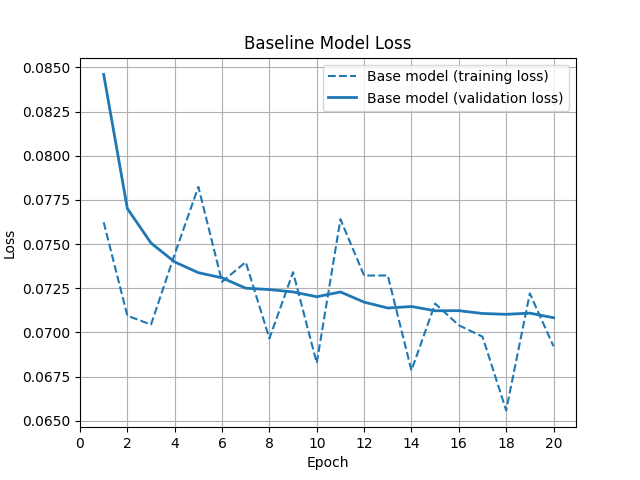

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/CAE-MNIST/outputs/base_model_files/base_model_loss_curve.png'))

### 🧪 Visual Benchmarks

- Reconstruction quality is high and consistent  
- Reconstructed digits closely match their original counterparts  
- Key visual features (shapes, edges, loops) are accurately captured across all digits

---

## 5. ✅ Conclusion

The baseline model demonstrates stable and consistent learning behavior across both training and validation sets. Its ability to reconstruct MNIST digits with high fidelity, despite its minimal configuration, confirms its effectiveness as a foundational architecture.

Given the simplicity of the MNIST dataset, this model has already reached a state where it can be used efficiently and reliably. It will serve as a reference point for evaluating the impact of architectural and training modifications in subsequent experiments.

---

## 1. 🔧 Setup


In [ ]:
from getpass import getpass

# get repo url
token = getpass("Paste your GitHub token")
user_name = 'vlad-uve'
repo_name = 'CAE-MNIST'
repo_url = f"https://{token}@github.com/{user_name}/{repo_name}.git"

# clone the repo
!git config --global user.email "vladislav.yushkevich.uve@gmail.com"
!git config --global user.name "vlad_uve"
!git clone {repo_url}
%cd /content/CAE-MNIST

# append system path
import sys
sys.path.append('/content/CAE-MNIST')

Paste your GitHub token··········
Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 363, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 363 (delta 40), reused 38 (delta 13), pack-reused 279 (from 1)
Receiving objects: 100% (363/363), 14.69 MiB | 10.57 MiB/s, done.
Resolving deltas: 100% (160/160), done.
/content/CAE-MNIST


In [ ]:
# import core model components
from src.model import AutoEncoder, Encoder, Decoder

# import training utilities
from src.train import train_model, validate_model, run_model_training

# import data loading functions
from src.data import get_train_dataloader, get_validation_dataloader

# import evaluation helpers
from src.evaluation import get_experiment_reconstructions, get_image_samples

# import plotting functions
from src.plotting import plot_baseline_history, plot_digits_row, plot_experiment_reconstructions

In [ ]:
# OS and file utilities
import os
import shutil

# PyTorch core modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data loading and transformations
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Model summary utility
from torchsummary import summary

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Plotting
import matplotlib.pyplot as plt

In [ ]:
# set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# set random seed for reproducibility
torch.manual_seed(0)

## 2. 🧠 Define Model Architecture


In [ ]:
# define baseline model architecture
base_n_channels = [32, 32, 64]
base_latent_dim = 32

# assign batch sizes
base_train_batch_size=32
base_validation_batch_size=500

# assign dataloaders
base_train_dataloader = get_train_dataloader(batch_size=base_train_batch_size, data_dir='../data')
base_validation_dataloader = get_validation_dataloader(batch_size=base_validation_batch_size, data_dir='../data')

# initialize baseline model
base_model = AutoEncoder(
    n_channels=base_n_channels,
    latent_dim=base_latent_dim
).to(device)

# define optimizer for baseline model
base_optimizer = optim.Adam(base_model.parameters(), lr=1e-3)

# define learning rate scheduler (monitors validation loss plateau)
base_scheduler = ReduceLROnPlateau(
    base_optimizer,
    mode='min',
    threshold=1e-3,
    patience=3,
    factor=0.5
)

# define baseline number of training epochs
base_num_epoch = 20

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.08MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.71MB/s]


In [ ]:
#description of the base model
base_description = f"""
Baseline model configuration:
- Architecture: n_channels = {base_n_channels}, latent_dim = {base_latent_dim}
- Batch normalization: False
- Activation function: ReLU
- Optimizer: Adam (lr = 1e-3)
- Scheduler: ReduceLROnPlateau (patience = 3, factor = 0.5, threshold = 1e-3)
- Training: {base_num_epoch} epochs
- Train batch size: {base_train_batch_size}
- Validation batch size: {base_validation_batch_size}
"""
print(base_description.strip())

# print model summary for baseline model
print(summary(base_model, input_size=(1, 28, 28)))

Baseline model configuration:
- Architecture: n_channels = [32, 32, 64], latent_dim = 32
- Batch normalization: False
- Activation function: ReLU
- Optimizer: Adam (lr = 1e-3)
- Scheduler: ReduceLROnPlateau (patience = 3, factor = 0.5, threshold = 1e-3)
- Training: 20 epochs
- Train batch size: 32
- Validation batch size: 500
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
          Identity-2           [-1, 32, 14, 14]               0
            Conv2d-3             [-1, 32, 7, 7]          16,416
          Identity-4             [-1, 32, 7, 7]               0
            Conv2d-5             [-1, 64, 4, 4]          18,496
          Identity-6             [-1, 64, 4, 4]               0
           Flatten-7                 [-1, 1024]               0
            Linear-8                   [-1, 32]          32,800
           Encoder-9           

## 3. 🏋️‍♀️ Training


In [ ]:
# train the baseline model using default settings
base_model, base_loss = run_model_training(
    model=base_model,
    train_dataloader=base_train_dataloader,
    validation_dataloader=base_validation_dataloader,
    optimizer=base_optimizer,
    scheduler=base_scheduler,
    num_epoch=base_num_epoch,
    device=device
)

# 📈 Results


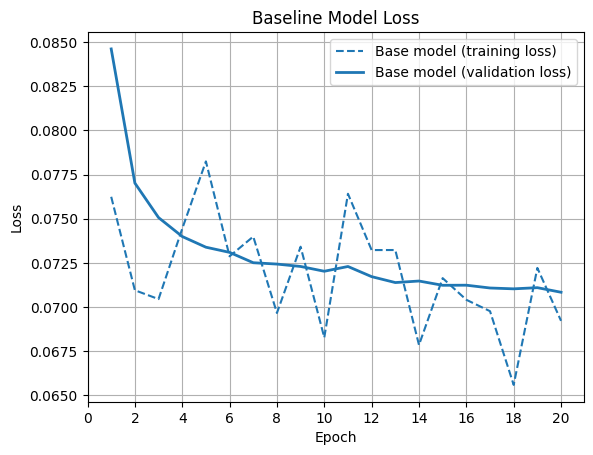

In [ ]:
# plot training and validation loss for baseline model
plot_baseline_history(base_loss, to_plot_train=True)
plt.grid()
plt.xticks(range(0, base_num_epoch + 1, 2))
plt.savefig(f"outputs/base_model_files/base_model_loss_curve.png")
plt.show()
plt.close()

In [ ]:
!git add outputs/base_model_files/base_model_loss_curve.png

!git commit -m "Add base model loss history curve"
!git push origin main

[main 9b29700] Add base model loss history curve
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 outputs/base_model_files/base_model_loss_curve.png
Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 46.89 KiB | 15.63 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/vlad-uve/CAE-MNIST.git
   cae61fd..9b29700  main -> main


In [ ]:
# get sample images and labels
sample_images, sample_labels = get_image_samples(base_validation_dataloader)

# get reconstructed digits from base model
base_reconstructed = get_experiment_reconstructions([base_model],sample_images, device)

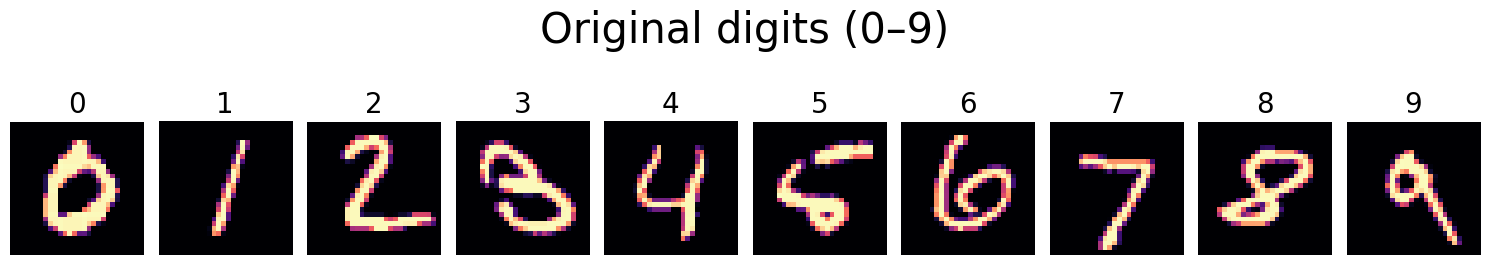

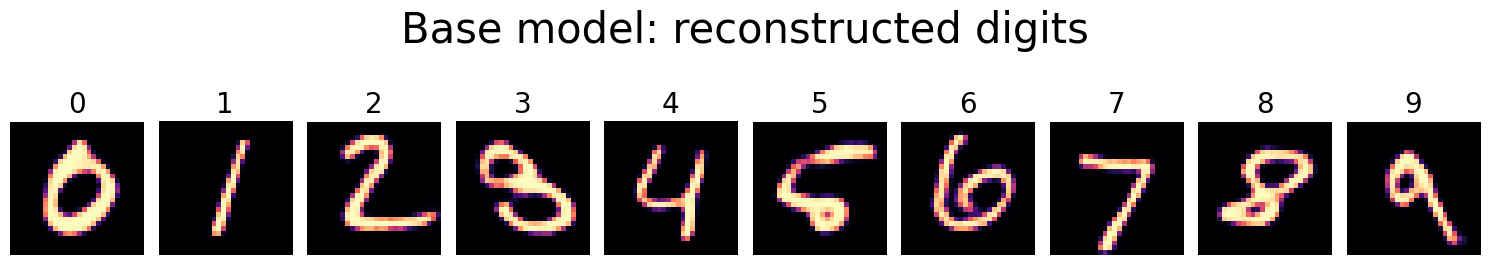

In [ ]:
# display original benchmark images
plot_digits_row(sample_images.squeeze(), sample_labels, title='Original digits (0–9)')

# display reconstructions from base model
plot_experiment_reconstructions(base_reconstructed, sample_labels, title_list=['Base model:'])

# Export / Import Model Files

## Save and Export Model Weights,

In [ ]:
# Local (temporary) export folder
local_export_folder = '/content/CAE_base_model_local'
os.makedirs(local_export_folder, exist_ok=True)

# Save model weights
torch.save(base_model.state_dict(), os.path.join(local_export_folder, 'base_model.pth'))

# Save loss history
torch.save(base_loss, os.path.join(local_export_folder, 'base_loss.pth'))

# Save description
with open(os.path.join(local_export_folder, 'base_description.txt'), 'w') as f:
    f.write(base_description.strip())

# Save reconstructe images
torch.save(base_reconstructed, os.path.join(local_export_folder, 'base_reconstructed.pth'))

In [ ]:
!git config --global user.email "vladislav.yushkevich.uve@gmail.com"
!git config --global user.name "vlad_uve"

# Paths
local_export_folder = '/content/CAE_base_model_local'
git_output_folder = '/content/CAE-MNIST/outputs/base_model_files'
files_to_copy = ['base_model.pth', 'base_loss.pth', 'base_description.txt', 'base_reconstructed.pth']

# Copy all files to Git outputs folder (overwrite silently)
os.makedirs(git_output_folder, exist_ok=True)
for file in files_to_copy:
    shutil.copy2(os.path.join(local_export_folder, file),
                 os.path.join(git_output_folder, file))

# Commit and push
%cd /content/CAE-MNIST
!git add outputs/base_model_files/*
!git commit -m "Update base model files"
!git push origin main

## Import Base Model Files

In [ ]:
# Paths to files inside the cloned Git repo
outputs_path = '/content/CAE-MNIST/outputs/base_model_files'

# Load model
base_model = AutoEncoder(n_channels=base_n_channels,
                         latent_dim=base_latent_dim)
base_model.load_state_dict(torch.load(os.path.join(outputs_path, 'base_model.pth'), map_location=device))
base_model.eval()

# Load loss history
base_loss = torch.load(os.path.join(outputs_path, 'base_loss.pth'))

# Load description text
with open(os.path.join(outputs_path, 'base_description.txt'), 'r') as f:
    base_description = f.read()

print("✅ Model, loss history, reconstructed images and description loaded successfully.")

✅ Model, loss history, reconstructed images and description loaded successfully.
